In [505]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# data    =  pd.read_csv('data.txt',sep=',',engine='python',encoding='cp949',names=['x','y','label'])
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

pointX = (pointX-pointX.mean()) / pointX.std()
pointY = (pointY-pointY.mean()) / pointY.std()
train_matrix = np.c_[np.ones(pointX.shape[0]),pointX,pointY]
##############################################################
degree = 2
alpha = 0.001
iteration = 1500
m = label.size
#theta 랜덤 생성
np.random.seed(777)
theta = [-1,1,1,0]
#########################################################
def high_demension(x,y,degree):
    res = np.c_[np.ones(x.shape[0]),x**degree,y**degree,x*y-5.5]
    return res

highf = high_demension(pointX,pointY,degree)
##############################################
def cost(label,gx):
    j = np.mean(((-label*np.log(gx))-((1-label)*np.log(1-gx))))
    return j
def sigmoid(z):
    return 1 / (1+np.exp(-z))
########################################
def gradient_descent(matrix,label,theta,iterations,alpha):
    cost_history=[]
    theta_history=[theta]
    accuracy_history=[]
    for i in range(iterations):
        prediction = np.dot(matrix,theta)
        sig = sigmoid(prediction)
        error = sig - label
        accuracy_history.append(sig)
        cost_history.append(cost(label,sig))
        theta = theta - (alpha*(1/m)*np.dot(matrix.T,error))
        theta_history.append(theta)
    return theta_history, cost_history , accuracy_history
####################################################
theta_history , cost_history, accuracy_history = gradient_descent(highf,label,theta,iteration,alpha)

##############
correct_history =[]
for i in range(iteration):
    correct = 0
    for j in range(len(accuracy_history[0])):
        if(((accuracy_history[i][j] <= 0.5) and (label[j] == 1)) or ((accuracy_history[i][j] > 0.5) and (label[j] == 0))):
            correct += 1
    correct_history.append(correct)        


for i in range(iteration):
     correct_history[i] = (correct_history[i] / len(accuracy_history[0])) * 100
#############################################################################
import matplotlib.pyplot as pp
def plotDecisionBoundary(x,y,theta,degree, axes):
    u = np.linspace(x.min(), x.max(), 100)
    v = np.linspace(y.min(), y.max(), 100)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = high_demension(U,V,degree)
    Z = X_poly.dot(theta[-1])
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['good', 'faulty', 'Decision Boundary'])
    return cs
    

## 1. plot the training data

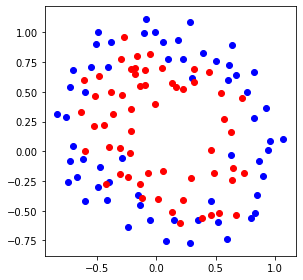

In [503]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 2. write down the high dimensional function

$g(x,y,\theta)=\theta_0 + \theta_1x^2 + \theta_2y^2 + \theta_3xy$

## 3. plot the training error

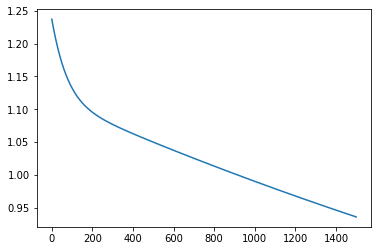

In [491]:
plt.plot(cost_history)

## 4 .plot the training accuracy

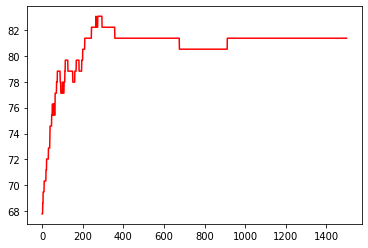

In [492]:
# for i in range(len(accuracy_history[0])):
plt.plot(correct_history,c='r')

## 5. Write down the final accuracy

In [493]:
print(correct_history[-1])

81.35593220338984


## 6. Plot the optimal classifier superimposed on the training data 

In [494]:
theta_history[-1]

array([-1.01033596,  0.56269331,  0.67304013,  0.05601171])

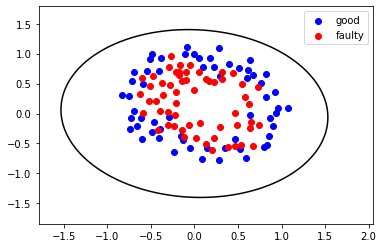

<Figure size 432x288 with 0 Axes>

In [506]:
fig, axes = pp.subplots();
plt.figure()
axes.scatter(pointX0, pointY0, c='b')
axes.scatter(pointX1, pointY1, c='r')
# axes.gca().set_aspect('equal', adjustable='box')
plotDecisionBoundary(pointX,pointY,theta_history, degree, axes)
plt.show()